In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
import statsmodels.api as sm
from matplotlib_venn import venn3

In [2]:
df=pd.read_csv('common_data/Sleuth_results_all.txt')
x=df.groupby('ens_gene').target_id.count()
isoform_genes=np.array(x[x>1].index)
df_abundance=pd.read_pickle('Figure5_data/GTEx_mTEC_expression_transcript.pkl')
aire=pd.read_csv('Supplemental_Figure7_data/human_aire_dep_genes_san.csv')
aire=np.array(aire.ensembl_gene_id)
fezf2=pd.read_csv('Supplemental_Figure7_data/human_fezf2_dep_genes.csv')
fezf2=np.array(fezf2.ensembl_gene_id)
housekeeping=pd.read_csv('Supplemental_Figure7_data/housekeeping_genes.csv')
housekeeping=np.array(housekeeping.ensembl_gene_id)
tra=pd.read_csv('Supplemental_Figure7_data/tra_genes.csv')
tra=np.array(tra.ensembl_gene_id)
other_tra=np.setdiff1d(tra,aire)
other_tra=np.setdiff1d(other_tra,fezf2)

In [3]:
try: 
    x=pd.read_pickle('Figure5_data/GTEx_mTEC_entropies.pkl')
except: 
    warnings.filterwarnings("ignore")
    for i,x in enumerate(isoform_genes):
        expression=df_abundance.loc[np.array(df[df.ens_gene==x].target_id)]
        gene_entropy=stats.entropy(expression,base=2)
        if i==0:
            genes=np.hstack((x,gene_entropy))
        else:
            genes=np.vstack((genes,np.hstack((x,gene_entropy))))
    x=pd.DataFrame(genes)
    x.to_pickle('Figure5_data/GTEx_mTEC_entropies.pkl')
x.index=np.array(x[0])
x=x.drop(columns=[0])
x=x.astype(float)
x.columns=df_abundance.columns
x2=x

z=x.mean()
z1=[x.split('_GTEX')[0] if 'GTEX' in x else x.split('_')[0]+x.split('_')[2] for x in z.index]
z=pd.DataFrame(np.vstack((z,z1)).T,columns=['Entropy','Tissue'])
z.Entropy=z.Entropy.astype(float)

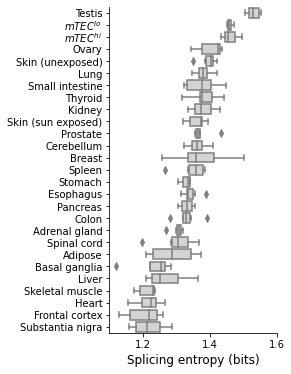

In [4]:
plt.figure(figsize=(3,6))
order_names=['Testis','$mTEC^{lo}$','$mTEC^{hi}$','Ovary','Skin (unexposed)','Lung','Small intestine','Thyroid', 'Kidney','Skin (sun exposed)','Prostate','Cerebellum','Breast','Spleen','Stomach','Esophagus','Pancreas','Colon','Adrenal gland','Spinal cord','Adipose','Basal ganglia','Liver','Skeletal muscle','Heart','Frontal cortex', 'Substantia nigra']
ax=sns.boxplot(y='Tissue',x='Entropy',data=z,order=z.groupby('Tissue').Entropy.median().sort_values(ascending=False).index,palette=['lightgray'])
for i,patch in enumerate(ax.artists):
    if i==1:
        patch.set_facecolor(sns.color_palette('muted')[1])
    elif i==2:
        patch.set_facecolor(sns.color_palette()[0])
    elif i==0:
        patch.set_facecolor(sns.color_palette()[2])
sns.despine()
plt.yticks(np.arange(len(order_names)),order_names,fontsize=10)#,rotation=90)
plt.xticks(np.arange(1,1.6,.2),fontsize=10)
plt.xlim([1.1,1.6])
plt.xlabel('Splicing entropy (bits)',fontsize=12)
plt.ylabel('')
plt.show()
plt.close()

In [5]:
orders={}
for i,x in enumerate(z.groupby('Tissue').Entropy.median().sort_values(ascending=False).index):
    for j,y in enumerate(order_names):
        if i==j:
            orders[x]=y

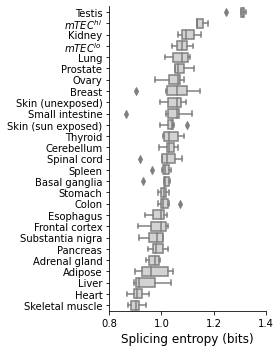

Ttest_relResult(statistic=-2.566819640761969, pvalue=0.12413918047300627)


In [6]:
x=x2
x=x[x.index.isin(aire)]

z=x.mean()
z1=[x.split('_GTEX')[0] if 'GTEX' in x else x.split('_')[0]+x.split('_')[2] for x in z.index]
z=pd.DataFrame(np.vstack((z,z1)).T,columns=['Entropy','Tissue'])
z.Entropy=z.Entropy.astype(float)

plt.figure(figsize=(4,5))
ax=sns.boxplot(y='Tissue',x='Entropy',data=z,order=z.groupby('Tissue').Entropy.median().sort_values(ascending=False).index,palette=['lightgray'])
for i,patch in enumerate(ax.artists):
    if i==1:
        patch.set_facecolor(sns.color_palette()[0])
    elif i==3:
        patch.set_facecolor(sns.color_palette('muted')[1])
    elif i==0:
        patch.set_facecolor(sns.color_palette()[2])
sns.despine()
plt.yticks(np.arange(len(order_names)),[orders[x] for x in z.groupby('Tissue').Entropy.median().sort_values(ascending=False).index],fontsize=10)#,rotation=90)
plt.xlim([.8,1.4])
plt.xlabel('Splicing entropy (bits)',fontsize=12)
plt.ylabel('')
plt.tight_layout()
plt.savefig('Supplemental_Panels/SFig7A.pdf',dpi=500)
plt.show()
plt.close()
print(stats.ttest_rel(z[z.Tissue=='mTEClo'].Entropy,z[z.Tissue=='mTEChi'].Entropy))

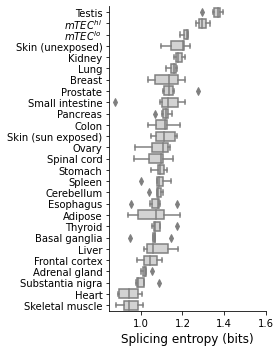

Ttest_relResult(statistic=-2.729082057743242, pvalue=0.11213036004792944)


In [7]:
x=x2
x=x[x.index.isin(fezf2)]

z=x.mean()
z1=[x.split('_GTEX')[0] if 'GTEX' in x else x.split('_')[0]+x.split('_')[2] for x in z.index]
z=pd.DataFrame(np.vstack((z,z1)).T,columns=['Entropy','Tissue'])
z.Entropy=z.Entropy.astype(float)

plt.figure(figsize=(4,5))
ax=sns.boxplot(y='Tissue',x='Entropy',data=z,order=z.groupby('Tissue').Entropy.median().sort_values(ascending=False).index,palette=['lightgray'])
for i,patch in enumerate(ax.artists):
    if i==2:
        patch.set_facecolor(sns.color_palette()[1])
    elif i==1:
        patch.set_facecolor(sns.color_palette('muted')[0])
    elif i==0:
        patch.set_facecolor(sns.color_palette()[2])
sns.despine()
plt.yticks(np.arange(len(order_names)),[orders[x] for x in z.groupby('Tissue').Entropy.median().sort_values(ascending=False).index],fontsize=10)#,rotation=90)
plt.xticks(np.arange(1,1.6,.2),fontsize=10)
plt.xlabel('Splicing entropy (bits)',fontsize=12)
plt.ylabel('')
plt.tight_layout()
plt.savefig('Supplemental_Panels/SFig7B.pdf',dpi=500)
plt.show()
plt.close()
print(stats.ttest_rel(z[z.Tissue=='mTEClo'].Entropy,z[z.Tissue=='mTEChi'].Entropy))

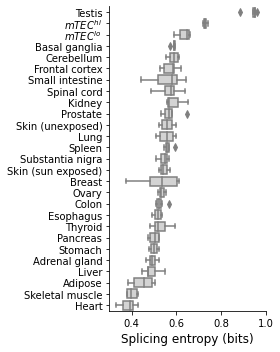

Ttest_relResult(statistic=-4.0710158541883175, pvalue=0.05537425925457519)


In [8]:
x=x2
x=x[x.index.isin(other_tra)]

z=x.mean()
z1=[x.split('_GTEX')[0] if 'GTEX' in x else x.split('_')[0]+x.split('_')[2] for x in z.index]
z=pd.DataFrame(np.vstack((z,z1)).T,columns=['Entropy','Tissue'])
z.Entropy=z.Entropy.astype(float)

plt.figure(figsize=(4,5))
ax=sns.boxplot(y='Tissue',x='Entropy',data=z,order=z.groupby('Tissue').Entropy.median().sort_values(ascending=False).index,palette=['lightgray'])
for i,patch in enumerate(ax.artists):
    if i==1:
        patch.set_facecolor(sns.color_palette()[0])
    elif i==2:
        patch.set_facecolor(sns.color_palette('muted')[1])
    elif i==0:
        patch.set_facecolor(sns.color_palette()[2])
sns.despine()
plt.yticks(np.arange(len(order_names)),[orders[x] for x in z.groupby('Tissue').Entropy.median().sort_values(ascending=False).index],fontsize=10)#,rotation=90)
#plt.xticks(np.arange(1,1.6,.2),fontsize=10)
plt.xlim([.3,1])
plt.xlabel('Splicing entropy (bits)',fontsize=12)
plt.ylabel('')
plt.tight_layout()
plt.savefig('Supplemental_Panels/SFig7C.pdf',dpi=500)
plt.show()
plt.close()
print(stats.ttest_rel(z[z.Tissue=='mTEClo'].Entropy,z[z.Tissue=='mTEChi'].Entropy))

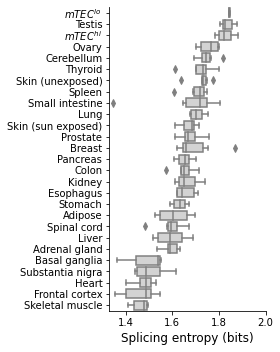

Ttest_relResult(statistic=0.5470979438509503, pvalue=0.6392006580713709)


In [9]:
x=x2
x=x[x.index.isin(housekeeping)]

z=x.mean()
z1=[x.split('_GTEX')[0] if 'GTEX' in x else x.split('_')[0]+x.split('_')[2] for x in z.index]
z=pd.DataFrame(np.vstack((z,z1)).T,columns=['Entropy','Tissue'])
z.Entropy=z.Entropy.astype(float)

plt.figure(figsize=(4,5))
ax=sns.boxplot(y='Tissue',x='Entropy',data=z,order=z.groupby('Tissue').Entropy.median().sort_values(ascending=False).index,palette=['lightgray'])
for i,patch in enumerate(ax.artists):
    if i==0:
        patch.set_facecolor(sns.color_palette()[1])
    elif i==2:
        patch.set_facecolor(sns.color_palette('muted')[0])
    elif i==1:
        patch.set_facecolor(sns.color_palette()[2])
sns.despine()
plt.yticks(np.arange(len(order_names)),[orders[x] for x in z.groupby('Tissue').Entropy.median().sort_values(ascending=False).index],fontsize=10)#,rotation=90)
plt.xticks(np.arange(1,2.2,.2),fontsize=10)
plt.xlim([1.33,2])
plt.xlabel('Splicing entropy (bits)',fontsize=12)
plt.ylabel('')
plt.tight_layout()
plt.savefig('Supplemental_Panels/SFig7D.pdf',dpi=500)
plt.show()
plt.close()
print(stats.ttest_rel(z[z.Tissue=='mTEClo'].Entropy,z[z.Tissue=='mTEChi'].Entropy))

/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_68165/1015250809.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  z=z.append(x.groupby('Tissue').median())
/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_68165/1015250809.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  z=z.append(x.groupby('Tissue').median())
/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_68165/1015250809.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  z=z.append(x.groupby('Tissue').median())
/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_68165/1015250809.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  z=z.a

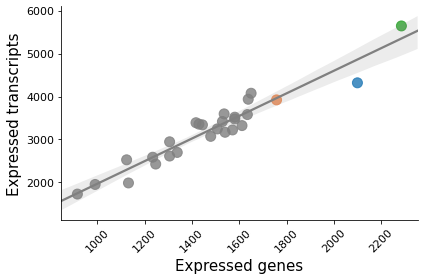

In [10]:
sleuth=pd.read_csv('common_data/Sleuth_results_all.txt')
sleuth=sleuth[sleuth.ens_gene.isin(aire)]
df_abundance=pd.read_pickle('Figure5_data/GTEx_mTEC_expression_transcript.pkl')
genes=pd.DataFrame(np.zeros((sleuth.ens_gene.unique().shape[0],df_abundance.shape[1])),index=sleuth.ens_gene.unique(),columns=df_abundance.columns)
for x in genes.index:
    genes.loc[x]=df_abundance.loc[sleuth[sleuth.ens_gene==x].target_id].sum()
genes.columns=[x.split('_GTEX')[0] if 'GTEX' in x else x.split('_')[2] for x in genes.columns]
x=1*(genes>1).sum()
count=[]
for a in x.index.unique():
    count.append(x[a].mean())
df_genes=pd.DataFrame(np.vstack((x.index.unique(),count)).T,columns=['Tissue','Count'])

genes=pd.read_pickle('Figure5_data/GTEx_mTEC_expression_transcript.pkl')
genes.columns=[x.split('_GTEX')[0] if 'GTEX' in x else x.split('_')[2] for x in genes.columns]
genes=genes[genes.index.isin(sleuth.target_id)]
i=0
for threshold in np.arange(0,10,.01):
    x=pd.DataFrame(((1*(genes>threshold)).sum())/genes.shape[0])
    x['Tissue']=np.array(x.index)
    x['Threshold']=[threshold]*x.shape[0]
    if i==0:
        z=x.groupby('Tissue').median()
    else:
        z=z.append(x.groupby('Tissue').median())
    i+=1
z=pd.DataFrame(z)
z.columns=['Fraction','Threshold']
z.Threshold=z.Threshold.astype(float)
z['Tissue']=np.array(z.index)

x=1*(genes>1).sum()
count=[]
for a in x.index.unique():
    count.append(x[a].mean())
df_transcript=pd.DataFrame(np.vstack((x.index.unique(),count)).T,columns=['Tissue','Count'])

df_genes['Transcripts']=df_transcript.loc[df_genes.index].Count.astype(float)
df_genes.Count=df_genes.Count.astype(float)
df_genes.columns=['Tissue','Genes','Transcripts']
df_genes=df_genes.sort_values(by='Transcripts',ascending=False)

for i,x in enumerate(df_genes.sort_values(by='Genes',ascending=0).Tissue):
    if x=='Testis':
        c=sns.color_palette()[2]
    elif x=='hi':
        c=sns.color_palette()[0]
    elif x=='lo':
        c=sns.color_palette('muted')[1]
    else:
        c=sns.color_palette()[7]
    if i==0:
        colors=c
    else:
        colors=np.hstack((colors,c))
colors=colors.reshape(int(colors.shape[0]/3),3)
plt.figure(figsize=(6,4))
sns.regplot(x='Genes',y='Transcripts',data=df_genes.sort_values(by='Genes',ascending=0),truncate=False,scatter_kws={"color": colors,'s':100}, line_kws={"color": "Grey"})
#plt.ylim([25000,75000])
plt.yticks(fontsize=11)
plt.xticks(fontsize=11,rotation=45)
plt.ylabel('Expressed transcripts',fontsize=15)
plt.xlabel('Expressed genes',fontsize=15)
sns.despine()
plt.tight_layout()
plt.savefig('Supplemental_Panels/SFig7A_2.pdf',dpi=500)
plt.show()
plt.close()

/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_68165/3910224143.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  z=z.append(x.groupby('Tissue').median())
/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_68165/3910224143.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  z=z.append(x.groupby('Tissue').median())
/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_68165/3910224143.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  z=z.append(x.groupby('Tissue').median())
/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_68165/3910224143.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  z=z.a

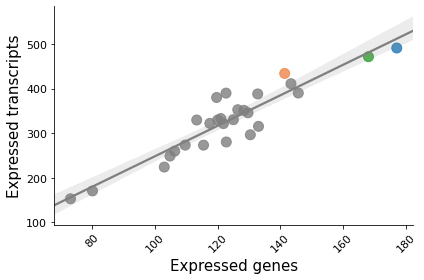

In [11]:
sleuth=pd.read_csv('common_data/Sleuth_results_all.txt')
sleuth=sleuth[sleuth.ens_gene.isin(fezf2)]
df_abundance=pd.read_pickle('Figure5_data/GTEx_mTEC_expression_transcript.pkl')
genes=pd.DataFrame(np.zeros((sleuth.ens_gene.unique().shape[0],df_abundance.shape[1])),index=sleuth.ens_gene.unique(),columns=df_abundance.columns)
for x in genes.index:
    genes.loc[x]=df_abundance.loc[sleuth[sleuth.ens_gene==x].target_id].sum()
genes.columns=[x.split('_GTEX')[0] if 'GTEX' in x else x.split('_')[2] for x in genes.columns]
x=1*(genes>1).sum()
count=[]
for a in x.index.unique():
    count.append(x[a].mean())
df_genes=pd.DataFrame(np.vstack((x.index.unique(),count)).T,columns=['Tissue','Count'])

genes=pd.read_pickle('Figure5_data/GTEx_mTEC_expression_transcript.pkl')
genes.columns=[x.split('_GTEX')[0] if 'GTEX' in x else x.split('_')[2] for x in genes.columns]
genes=genes[genes.index.isin(sleuth.target_id)]
i=0
for threshold in np.arange(0,10,.01):
    x=pd.DataFrame(((1*(genes>threshold)).sum())/genes.shape[0])
    x['Tissue']=np.array(x.index)
    x['Threshold']=[threshold]*x.shape[0]
    if i==0:
        z=x.groupby('Tissue').median()
    else:
        z=z.append(x.groupby('Tissue').median())
    i+=1
z=pd.DataFrame(z)
z.columns=['Fraction','Threshold']
z.Threshold=z.Threshold.astype(float)
z['Tissue']=np.array(z.index)

x=1*(genes>1).sum()
count=[]
for a in x.index.unique():
    count.append(x[a].mean())
df_transcript=pd.DataFrame(np.vstack((x.index.unique(),count)).T,columns=['Tissue','Count'])

df_genes['Transcripts']=df_transcript.loc[df_genes.index].Count.astype(float)
df_genes.Count=df_genes.Count.astype(float)
df_genes.columns=['Tissue','Genes','Transcripts']
df_genes=df_genes.sort_values(by='Transcripts',ascending=False)

for i,x in enumerate(df_genes.sort_values(by='Genes',ascending=0).Tissue):
    if x=='Testis':
        c=sns.color_palette()[2]
    elif x=='hi':
        c=sns.color_palette()[0]
    elif x=='lo':
        c=sns.color_palette('muted')[1]
    else:
        c=sns.color_palette()[7]
    if i==0:
        colors=c
    else:
        colors=np.hstack((colors,c))
colors=colors.reshape(int(colors.shape[0]/3),3)
plt.figure(figsize=(6,4))
sns.regplot(x='Genes',y='Transcripts',data=df_genes.sort_values(by='Genes',ascending=0),truncate=False,scatter_kws={"color": colors,'s':100}, line_kws={"color": "Grey"})
#plt.ylim([25000,75000])
plt.yticks(fontsize=11)
plt.xticks(fontsize=11,rotation=45)
plt.ylabel('Expressed transcripts',fontsize=15)
plt.xlabel('Expressed genes',fontsize=15)
sns.despine()
plt.tight_layout()
plt.savefig('Supplemental_Panels/SFig7B_2.pdf',dpi=500)
plt.show()
plt.close()

/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_68165/4190240422.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  z=z.append(x.groupby('Tissue').median())
/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_68165/4190240422.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  z=z.append(x.groupby('Tissue').median())
/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_68165/4190240422.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  z=z.append(x.groupby('Tissue').median())
/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_68165/4190240422.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  z=z.a

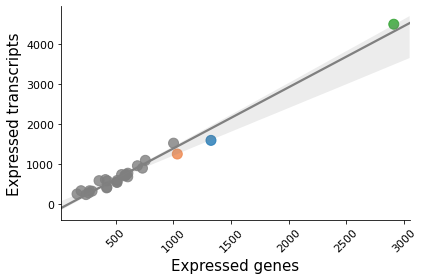

In [12]:
sleuth=pd.read_csv('common_data/Sleuth_results_all.txt')
sleuth=sleuth[sleuth.ens_gene.isin(other_tra)]
df_abundance=pd.read_pickle('Figure5_data/GTEx_mTEC_expression_transcript.pkl')
genes=pd.DataFrame(np.zeros((sleuth.ens_gene.unique().shape[0],df_abundance.shape[1])),index=sleuth.ens_gene.unique(),columns=df_abundance.columns)
for x in genes.index:
    genes.loc[x]=df_abundance.loc[sleuth[sleuth.ens_gene==x].target_id].sum()
genes.columns=[x.split('_GTEX')[0] if 'GTEX' in x else x.split('_')[2] for x in genes.columns]
x=1*(genes>1).sum()
count=[]
for a in x.index.unique():
    count.append(x[a].mean())
df_genes=pd.DataFrame(np.vstack((x.index.unique(),count)).T,columns=['Tissue','Count'])

genes=pd.read_pickle('Figure5_data/GTEx_mTEC_expression_transcript.pkl')
genes.columns=[x.split('_GTEX')[0] if 'GTEX' in x else x.split('_')[2] for x in genes.columns]
genes=genes[genes.index.isin(sleuth.target_id)]
i=0
for threshold in np.arange(0,10,.01):
    x=pd.DataFrame(((1*(genes>threshold)).sum())/genes.shape[0])
    x['Tissue']=np.array(x.index)
    x['Threshold']=[threshold]*x.shape[0]
    if i==0:
        z=x.groupby('Tissue').median()
    else:
        z=z.append(x.groupby('Tissue').median())
    i+=1
z=pd.DataFrame(z)
z.columns=['Fraction','Threshold']
z.Threshold=z.Threshold.astype(float)
z['Tissue']=np.array(z.index)

x=1*(genes>1).sum()
count=[]
for a in x.index.unique():
    count.append(x[a].mean())
df_transcript=pd.DataFrame(np.vstack((x.index.unique(),count)).T,columns=['Tissue','Count'])

df_genes['Transcripts']=df_transcript.loc[df_genes.index].Count.astype(float)
df_genes.Count=df_genes.Count.astype(float)
df_genes.columns=['Tissue','Genes','Transcripts']
df_genes=df_genes.sort_values(by='Transcripts',ascending=False)

for i,x in enumerate(df_genes.sort_values(by='Genes',ascending=0).Tissue):
    if x=='Testis':
        c=sns.color_palette()[2]
    elif x=='hi':
        c=sns.color_palette()[0]
    elif x=='lo':
        c=sns.color_palette('muted')[1]
    else:
        c=sns.color_palette()[7]
    if i==0:
        colors=c
    else:
        colors=np.hstack((colors,c))
colors=colors.reshape(int(colors.shape[0]/3),3)
plt.figure(figsize=(6,4))
sns.regplot(x='Genes',y='Transcripts',data=df_genes.sort_values(by='Genes',ascending=0),truncate=False,scatter_kws={"color": colors,'s':100}, line_kws={"color": "Grey"})
#plt.ylim([25000,75000])
plt.yticks(fontsize=11)
plt.xticks(fontsize=11,rotation=45)
plt.ylabel('Expressed transcripts',fontsize=15)
plt.xlabel('Expressed genes',fontsize=15)
sns.despine()
plt.tight_layout()
plt.savefig('Supplemental_Panels/SFig7C_2.pdf',dpi=500)
plt.show()
plt.close()

/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_68165/1546233787.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  z=z.append(x.groupby('Tissue').median())
/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_68165/1546233787.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  z=z.append(x.groupby('Tissue').median())
/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_68165/1546233787.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  z=z.append(x.groupby('Tissue').median())
/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_68165/1546233787.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  z=z.a

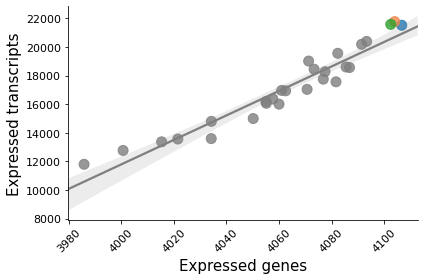

In [13]:
sleuth=pd.read_csv('common_data/Sleuth_results_all.txt')
sleuth=sleuth[sleuth.ens_gene.isin(housekeeping)]
df_abundance=pd.read_pickle('Figure5_data/GTEx_mTEC_expression_transcript.pkl')
genes=pd.DataFrame(np.zeros((sleuth.ens_gene.unique().shape[0],df_abundance.shape[1])),index=sleuth.ens_gene.unique(),columns=df_abundance.columns)
for x in genes.index:
    genes.loc[x]=df_abundance.loc[sleuth[sleuth.ens_gene==x].target_id].sum()
genes.columns=[x.split('_GTEX')[0] if 'GTEX' in x else x.split('_')[2] for x in genes.columns]
x=1*(genes>1).sum()
count=[]
for a in x.index.unique():
    count.append(x[a].mean())
df_genes=pd.DataFrame(np.vstack((x.index.unique(),count)).T,columns=['Tissue','Count'])

genes=pd.read_pickle('Figure5_data/GTEx_mTEC_expression_transcript.pkl')
genes.columns=[x.split('_GTEX')[0] if 'GTEX' in x else x.split('_')[2] for x in genes.columns]
genes=genes[genes.index.isin(sleuth.target_id)]
i=0
for threshold in np.arange(0,10,.01):
    x=pd.DataFrame(((1*(genes>threshold)).sum())/genes.shape[0])
    x['Tissue']=np.array(x.index)
    x['Threshold']=[threshold]*x.shape[0]
    if i==0:
        z=x.groupby('Tissue').median()
    else:
        z=z.append(x.groupby('Tissue').median())
    i+=1
z=pd.DataFrame(z)
z.columns=['Fraction','Threshold']
z.Threshold=z.Threshold.astype(float)
z['Tissue']=np.array(z.index)

x=1*(genes>1).sum()
count=[]
for a in x.index.unique():
    count.append(x[a].mean())
df_transcript=pd.DataFrame(np.vstack((x.index.unique(),count)).T,columns=['Tissue','Count'])

df_genes['Transcripts']=df_transcript.loc[df_genes.index].Count.astype(float)
df_genes.Count=df_genes.Count.astype(float)
df_genes.columns=['Tissue','Genes','Transcripts']
df_genes=df_genes.sort_values(by='Transcripts',ascending=False)

for i,x in enumerate(df_genes.sort_values(by='Genes',ascending=0).Tissue):
    if x=='Testis':
        c=sns.color_palette()[2]
    elif x=='hi':
        c=sns.color_palette()[0]
    elif x=='lo':
        c=sns.color_palette('muted')[1]
    else:
        c=sns.color_palette()[7]
    if i==0:
        colors=c
    else:
        colors=np.hstack((colors,c))
colors=colors.reshape(int(colors.shape[0]/3),3)
plt.figure(figsize=(6,4))
sns.regplot(x='Genes',y='Transcripts',data=df_genes.sort_values(by='Genes',ascending=0),truncate=False,scatter_kws={"color": colors,'s':100}, line_kws={"color": "Grey"})
#plt.ylim([25000,75000])
plt.yticks(fontsize=11)
plt.xticks(fontsize=11,rotation=45)
plt.ylabel('Expressed transcripts',fontsize=15)
plt.xlabel('Expressed genes',fontsize=15)
sns.despine()
plt.tight_layout()
plt.savefig('Supplemental_Panels/SFig7D_2.pdf',dpi=500)
plt.show()
plt.close()